Author: Tatiana Belova

In [81]:
rm(list=ls())
require("ComplexHeatmap") 
require(RColorBrewer)
mypalette <- brewer.pal(11,"RdYlBu")
morecols <- colorRampPalette(mypalette)
require(gplots)
require(GOstats)
require(data.table)
require(dplyr)

In [82]:
degs <- fread("DEGs.minimal_info.tsv")

In [83]:
head(degs)

geneid,spectype,origin,name,superfamily,TAP_class,defline,deltaDEK_vs_OE.b_wt,WT_vs_deltaDEK.b_wt,WT_vs_LG3.b_wt,⋯,elongation_caulonema.late.reduced_vs_normal.qval_lrt,gametophore_formation.aberrant_vs_normal.qval_lrt,gametophore_formation.arrested_vs_normal.qval_lrt,gametophore_formation.delayed_vs_normal.qval_lrt,number_buds_per_filament.high_vs_normal.qval_lrt,percents_filaments_with_buds.high_vs_normal.qval_lrt,percents_filaments_with_buds.low_vs_normal.qval_lrt,protonemata_branching.aberrant_vs_normal.qval_lrt,rhizoid_formation.delayed_vs_normal.qval_lrt,rhizoid_formation.ectopic_vs_normal.qval_lrt
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pp3c1_100.mRNA,mRNA,cosmoss,,NA,NA,PTHR19139//PTHR19139:SF147 - AQUAPORIN TRANSPORTER // SUBFAMILY NOT NAMED (1 of 1),-0.14447429,0.03519676,0.262197137,⋯,0.3369932,0.2364591,0.5566207,1.000000000,0.9484040,0.7356034,0.7026984,0.2035819,1.878378e-01,0.7446988
Pp3c1_1000.mRNA,mRNA,cosmoss,,NA,NA,NA,-0.27292998,-0.05173580,-0.009327494,⋯,0.5332108,0.4095824,0.3752901,0.001433834,0.9769126,0.5500804,0.4910445,0.3866815,4.058102e-05,0.3464745
Pp3c1_10000.mRNA,mRNA,cosmoss,,NA,NA,K00021 - hydroxymethylglutaryl-CoA reductase (NADPH) (HMGCR) (1 of 3),0.09853629,-0.12750588,0.144333576,⋯,1.0000000,0.4095824,1.0000000,0.653042712,0.2606938,0.6395874,0.8204697,0.8653970,1.000000e+00,0.5573633
Pp3c1_10010.mRNA,mRNA,cosmoss,,NA,NA,"PTHR11451:SF41 - GLUTAMATE--TRNA LIGASE, MITOCHONDRIAL-RELATED (1 of 1)",-0.20581712,0.03086996,0.019516436,⋯,0.6329936,0.6527880,1.0000000,0.164413823,0.4195042,1.0000000,0.7382343,0.4440858,4.620523e-02,1.0000000
Pp3c1_10040.mRNA,mRNA,cosmoss,,NA,NA,K14846 - ribosome production factor 1 (RPF1) (1 of 1),-0.17333214,-0.01953257,0.088532877,⋯,0.5752269,0.1459987,0.4990066,0.021573836,0.3754352,0.6495691,0.8001721,0.3658798,4.540952e-04,0.2623199
Pp3c1_10050.mRNA,mRNA,cosmoss,,NA,NA,3.1.1.56 - Methylumbelliferyl-acetate deacetylase / Esterase D (1 of 1),0.33416986,-0.18787943,0.317312864,⋯,0.5644653,0.3874502,0.5136794,0.091799361,0.2434924,NA,0.5881345,0.4013159,1.340674e-01,0.5693843


In [84]:
degs.sel <- degs[,c("geneid", "name", "superfamily","TAP_class","WT_vs_deltaDEK.b_wt", "WT_vs_deltaDEK.test_stat_lrt","WT_vs_deltaDEK.qval_lrt",
                                       "WT_vs_OE.b_wt", "WT_vs_OE.test_stat_lrt","WT_vs_OE.qval_lrt",
                                        "deltaDEK_vs_OE.b_wt", "deltaDEK_vs_OE.test_stat_lrt", "deltaDEK_vs_OE.qval_lrt")]

In [ ]:
### patternI selection

#### down regulated in wt compared to overexpressor
#### up regulated in wt compared to delta mutant
#### up regulated in overexpressor to delta mutant



In [85]:
q.val.cut <- 0.1
#q.val.cut <- 0.01 

pattern_1 <- degs.sel %>%
   filter(WT_vs_OE.qval_lrt<=q.val.cut, WT_vs_OE.b_wt>0, WT_vs_deltaDEK.qval_lrt<=q.val.cut, WT_vs_deltaDEK.b_wt<0,
          deltaDEK_vs_OE.qval_lrt<=q.val.cut, deltaDEK_vs_OE.b_wt>0)

dim(pattern_1) ##2639

[1] 2639   13

In [21]:
#write.table(pattern_1$geneid, "/Users/tabe/Desktop/physco/downDEK1_upOEX_qval_0.1.txt",
        #  col.names=T, row.names=F, sep="\t", quote=F)

#write.table(pattern_1$geneid, "/Users/tabe/Desktop/physco/downDEK1_upOEX_qval_0.01.txt",
 #          col.names=T, row.names=F, sep="\t", quote=F)


In [ ]:
### up regualted in wt compared to overexpressor       
### down regulated in wt compared to delta mutant
### down regulated in overexpressor to delta mutant

In [86]:
pattern_2 <- degs.sel %>%
  filter(WT_vs_OE.qval_lrt<=q.val.cut, WT_vs_OE.b_wt<0, WT_vs_deltaDEK.qval_lrt<=q.val.cut, WT_vs_deltaDEK.b_wt>0,
         deltaDEK_vs_OE.qval_lrt<=q.val.cut, deltaDEK_vs_OE.b_wt<0)

dim(pattern_2)

[1] 2445   13

In [ ]:
#write.table(pattern_1$geneid, "/Users/tabe/Desktop/physco/upDEK1_downOEX_qval_0.1.txt",
        #  col.names=T, row.names=F, sep="\t", quote=F)

#write.table(pattern_1$geneid, "/Users/tabe/Desktop/physco/upDEK1_downOEX_qval_0.01.txt",
 #          col.names=T, row.names=F, sep="\t", quote=F)

In [88]:
###read in expression table

exp <- read.table("/Users/tabe/Desktop/physco/all_genes.vst.tsv", head=T, sep="\t")
head(rownames(exp))
exp.mean <- data.table("WT.3"=rowMeans(exp[,grep("W3.", colnames(exp))]),
                       "WT.5"=rowMeans(exp[,grep("W5", colnames(exp))]),
                       "WT.9"=rowMeans(exp[,grep("W9", colnames(exp))]),
                       "WT.12"=rowMeans(exp[,grep("W12", colnames(exp))]),
                       "WT.14"=rowMeans(exp[,grep("W14", colnames(exp))]),
                       
                       "DEK.3"=rowMeans(exp[,grep("D3", colnames(exp))]),
                       "DEK.5"=rowMeans(exp[,grep("D5", colnames(exp))]),
                       "DEK.9"=rowMeans(exp[,grep("D9", colnames(exp))]),
                       "DEK.12"=rowMeans(exp[,grep("D12", colnames(exp))]),
                       "DEK.14"=rowMeans(exp[,grep("D14", colnames(exp))]),
                       
                       "LOOP.3"=rowMeans(exp[,grep("LO3", colnames(exp))]),
                       "LOOP.5"=rowMeans(exp[,grep("LO5", colnames(exp))]),
                       "LOOP.9"=rowMeans(exp[,grep("LO9", colnames(exp))]),
                       "LOOP.12"=rowMeans(exp[,grep("LO12", colnames(exp))]),
                       "LOOP.14"=rowMeans(exp[,grep("LO14", colnames(exp))]),
                       
                       "LG.3"=rowMeans(exp[,grep("LG3", colnames(exp))]),
                       "LG.5"=rowMeans(exp[,grep("LG5", colnames(exp))]),
                       "LG.9"=rowMeans(exp[,grep("LG9", colnames(exp))]),
                       "LG.12"=rowMeans(exp[,grep("LG12", colnames(exp))]),
                       "LG.14"=rowMeans(exp[,grep("LG14", colnames(exp))]),
                       
                       "OEX.3"=rowMeans(exp[,grep("X13.1.3.2|X14.1.3.3", colnames(exp))]),
                       "OEX.5"=rowMeans(exp[,grep("X27.1.5|X28.1.5.2|X29.1.5.3", colnames(exp))]),
                       "OEX.9"=rowMeans(exp[,grep("X42.1.9|X43.1.9.2|X44.1.9.3", colnames(exp))]),
                       "OEX.12"=rowMeans(exp[,grep("X57.1.12|X58.1.12.2|X59.1.12.3", colnames(exp))]),
                       "OEX.14"=rowMeans(exp[,grep("X72.1.14|X73.1.14.2|X74.1.14.3", colnames(exp))]))

rownames(exp.mean) <- rownames(exp)
head(exp.mean)

[1] "Pp3c1_100.mRNA"         "Pp3c1_1000.mRNA"        "Pp3c1_10000.mRNA"      
[4] "Pp3c1_10010.mRNA"       "Pp3c1_10020.seryl_tRNA" "Pp3c1_10040.mRNA"

WT.3,WT.5,WT.9,WT.12,WT.14,DEK.3,DEK.5,DEK.9,DEK.12,DEK.14,⋯,LG.3,LG.5,LG.9,LG.12,LG.14,OEX.3,OEX.5,OEX.9,OEX.12,OEX.14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.247294,9.764706,9.196099,10.158430,9.909475,7.832882,9.693658,9.434740,10.354493,9.990324,⋯,8.492813,9.921754,9.554977,10.582472,10.421669,8.009602,9.529194,9.339904,10.119785,9.776937
9.935364,9.179358,8.893487,8.504965,8.280466,10.083762,9.144631,8.837545,8.367881,8.239007,⋯,9.867234,9.215113,8.762372,8.458046,8.522520,9.910691,9.043203,8.287757,7.937496,7.743763
10.179762,10.122809,10.096837,9.357896,9.528834,9.948181,9.814849,9.801772,9.448618,9.507371,⋯,10.648604,10.359588,10.037820,9.720316,9.644963,10.011231,10.083625,9.896433,9.560143,9.592338
9.955742,9.565196,8.892666,9.019900,8.438731,9.905236,9.472982,9.127234,9.057657,8.522572,⋯,9.763130,9.531209,8.943588,9.161130,8.614568,9.891265,9.439702,8.621825,8.614569,8.252225
4.192570,4.192570,4.192570,4.299621,4.192570,4.192570,4.192570,4.192570,4.192570,4.192570,⋯,4.192570,4.192570,4.192570,4.192570,4.192570,4.192570,4.192570,4.192570,4.192570,4.192570
8.879215,8.738825,8.508738,8.480865,8.385536,8.765557,8.704093,8.644632,8.406490,8.399035,⋯,9.007167,8.697314,8.504276,8.760151,8.621048,8.634591,8.658807,8.346369,8.164365,8.073565


In [89]:
exp.mean$tracking_id <- rownames(exp.mean)
mat_1 <- exp.mean[rownames(exp.mean) %in% pattern_1$geneid,]
trackid_1 <- mat_1$tracking_id


rownames(mat_1) <- mat_1$tracking_id

mat_1 <- mat_1[,grep("WT|DEK|OEX", colnames(mat_1)), with=FALSE]
head(mat_1)
mat_1_scaled <- t(apply(mat_1[, 1:15], 1, scale))
colnames(mat_1_scaled) <- colnames(mat_1)
mat_1_scaled <- mat_1_scaled[, c("WT.3",  "WT.5",  "WT.9","WT.12", "WT.14","DEK.3", "DEK.5", "DEK.9", "DEK.12", "DEK.14", "OEX.3", "OEX.5", "OEX.9", "OEX.12", "OEX.14") ]
rownames(mat_1_scaled) <-trackid_1
head(mat_1_scaled)
dim(mat_1_scaled)

WT.3,WT.5,WT.9,WT.12,WT.14,DEK.3,DEK.5,DEK.9,DEK.12,DEK.14,OEX.3,OEX.5,OEX.9,OEX.12,OEX.14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.063079,7.134562,7.146712,6.978569,7.209031,6.999921,7.105260,7.076253,6.989726,7.173923,7.166077,7.104579,7.100003,7.134000,7.156492
8.814426,8.923116,9.293136,9.259127,9.390720,8.850203,8.840821,9.065698,9.151648,9.432836,8.751906,8.858474,9.350395,9.396179,9.499560
12.672218,12.625204,11.662845,10.832569,10.226390,12.538115,12.491209,11.654117,10.135212,9.593715,12.779483,12.630557,12.327184,11.953518,11.924862
10.974149,10.493437,11.042178,10.097465,10.660770,10.721790,10.720261,10.596782,10.117115,10.505808,11.252142,10.942687,11.020401,10.563634,10.796822
8.834377,8.803473,8.730502,8.725299,8.673500,8.757931,8.866296,8.710831,8.569087,8.551440,8.729582,8.903086,8.794346,8.932687,8.770555
9.248717,9.170861,8.580194,8.844875,8.594724,8.818722,8.922035,8.652461,8.308263,7.862235,8.914716,8.880326,9.107777,9.237461,9.180990


,WT.3,WT.5,WT.9,WT.12,WT.14,DEK.3,DEK.5,DEK.9,DEK.12,DEK.14,OEX.3,OEX.5,OEX.9,OEX.12,OEX.14
Pp3c1_10200.mRNA,-0.5652908,0.4585717,0.63258831,-1.77572811,1.5251951,-1.469900828,0.03887888,-0.37658941,-1.61593132,1.0223407,0.9099636,0.02912466,-0.03641941,0.4505207,0.7726761
Pp3c1_10220.mRNA,-1.1721626,-0.7622299,0.63331632,0.50504964,1.0013607,-1.037226215,-1.07260967,-0.22447749,0.09968974,1.1602023,-1.4079568,-1.00603304,0.84927186,1.0219488,1.4118564
Pp3c1_11030.mRNA,0.8904136,0.8456769,-0.07006808,-0.86012781,-1.4369454,0.762805621,0.71817188,-0.07837325,-1.52370679,-2.0389748,0.9924831,0.85077050,0.56209211,0.2065252,0.1792572
Pp3c1_11190.mRNA,0.8412422,-0.6358053,1.05027213,-1.85248112,-0.1216531,0.065837631,0.06114134,-0.31826573,-1.79210312,-0.5977945,1.6954124,0.74457270,0.98335851,-0.4201178,0.2963838
Pp3c1_11820.mRNA,0.7183263,0.4319319,-0.24432582,-0.29254974,-0.7725929,0.009873200,1.01413769,-0.42662837,-1.74023390,-1.9037773,-0.2528521,1.35508440,0.34733953,1.6294077,0.1268595
Pp3c1_11980.mRNA,1.1206583,0.9163710,-0.63349290,0.06100917,-0.5953668,-0.007612885,0.26347059,-0.44387028,-1.34701635,-2.5173577,0.2442667,0.15402910,0.75084168,1.0911231,0.9429473


[1] 2639   15

In [90]:
ht1 <- Heatmap(as.matrix(mat_1_scaled), col =rev(brewer.pal(11,'RdYlBu')), cluster_rows = TRUE, cluster_columns=FALSE, show_row_names =FALSE, show_column_names = TRUE, column_names_gp = gpar(fontsize = 9) , row_names_gp = gpar(fontsize=4),
        heatmap_legend_param = list(title = "Expression", title_gp = gpar(fontsize = 10),   labels_gp = gpar(fontsize = 8)))
#ht1    

In [91]:
mat_1_scaled_km <- kmeans(mat_1_scaled, 3)
km.clust_1 <- data.table("id"=names(mat_1_scaled_km$cluster), "cluster"=mat_1_scaled_km$cluster)
split_1 <- paste0("Cluster\n",mat_1_scaled_km$cluster)
head(split_1); length(split_1)

[1] "Cluster\n3" "Cluster\n3" "Cluster\n1" "Cluster\n1" "Cluster\n2"
[6] "Cluster\n2"

[1] 2639

In [ ]:
#write.table(km.clust, "/Users/tabe/Desktop/physco/kmeans_clusters_pattern_1_0.01.txt", col.names=T, row.names=F, sep="\t", quote=F)
#write.table(km.clust, "/Users/tabe/Desktop/physco/kmeans_clusters_pattern_1_q.0.1.txt", col.names=T, row.names=F, sep="\t", quote=F)



In [92]:
#km.clust_1 <- fread("/Users/tabe/Desktop/physco/kmeans_clusters_pattern_1_0.01.txt")
km.clust_1 <- fread("/Users/tabe/Desktop/physco/kmeans_clusters_pattern_1_q.0.1.txt")

In [93]:
split_1 <- paste0("Cluster\n",km.clust_1$cluster)

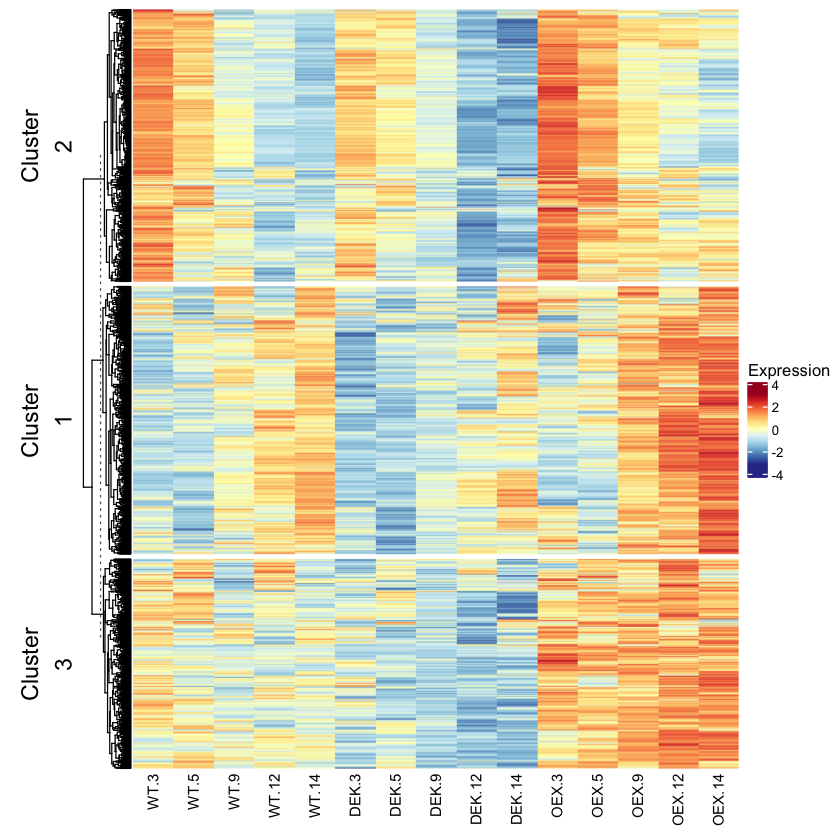

In [94]:
Heatmap(as.matrix(mat_1_scaled[,1:15]), split = split_1, col =rev(brewer.pal(11,'RdYlBu')), cluster_rows = TRUE, cluster_columns=FALSE, show_row_names = FALSE, show_column_names = TRUE, column_names_gp = gpar(fontsize = 9) , row_names_gp = gpar(fontsize=4),
        heatmap_legend_param = list(title = "Expression", title_gp = gpar(fontsize = 10),   labels_gp = gpar(fontsize = 8)))


In [95]:
mat_2 <- exp.mean[rownames(exp.mean) %in% pattern_2$geneid,]
trackid_2 <- mat_2$tracking_id

In [96]:
rownames(mat_2) <- mat_2$tracking_id

mat_2 <- mat_2[,grep("WT|DEK|OEX", colnames(mat_2)), with=FALSE]
head(mat_2)
mat_2_scaled <- t(apply(mat_2[, 1:15], 1, scale))
colnames(mat_2_scaled) <- colnames(mat_2)
mat_2_scaled <- mat_2_scaled[, c("WT.3",  "WT.5",  "WT.9","WT.12", "WT.14","DEK.3", "DEK.5", "DEK.9", "DEK.12", "DEK.14", "OEX.3", "OEX.5", "OEX.9", "OEX.12", "OEX.14") ]
rownames(mat_2_scaled) <-trackid_2
head(mat_2_scaled)
dim(mat_2_scaled)

WT.3,WT.5,WT.9,WT.12,WT.14,DEK.3,DEK.5,DEK.9,DEK.12,DEK.14,OEX.3,OEX.5,OEX.9,OEX.12,OEX.14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.220332,8.889308,8.976492,9.115049,8.902622,9.313574,8.951280,9.141395,9.450606,9.167288,9.284997,8.903904,8.832361,9.066202,8.929063
8.066756,7.894368,8.197626,8.216697,8.448025,8.066750,8.014061,8.073299,8.319416,8.432884,7.941712,7.568955,7.692151,8.052628,8.189334
7.891453,7.870283,7.596357,7.649682,7.743948,7.931461,7.830518,7.836385,7.714179,7.834587,8.051664,7.813429,7.610121,7.483227,7.656640
5.408695,5.430540,5.423060,5.651007,5.518623,5.210255,5.503527,5.492416,5.508012,5.771969,5.468647,5.507201,5.446948,5.475972,5.427647
7.936899,7.685529,7.587659,7.762265,7.424781,7.913688,7.622317,7.780181,7.772966,7.787835,7.893855,7.643378,7.453362,7.743259,7.426480
4.192570,4.934546,6.750979,7.144125,6.845491,5.415067,6.459751,7.480015,7.560903,8.064009,4.192570,4.361961,5.033612,5.108490,5.126632


,WT.3,WT.5,WT.9,WT.12,WT.14,DEK.3,DEK.5,DEK.9,DEK.12,DEK.14,OEX.3,OEX.5,OEX.9,OEX.12,OEX.14
Pp3c1_10400.mRNA,0.78076258,-1.01361657,-0.5410186,0.2100560,-0.9414465,1.28620151,-0.6776872,0.35287297,2.0290090,0.4932258,1.1312947,-0.9344953,-1.3223107,-0.05472998,-0.7981179
Pp3c1_10760.mRNA,-0.04738782,-0.75436664,0.4893218,0.5675371,1.5162338,-0.04741257,-0.2634925,-0.02055506,0.9887963,1.4541387,-0.5602044,-2.0889183,-1.5836777,-0.10532838,0.4553156
Pp3c1_10830.mRNA,0.82791959,0.68641168,-1.1446367,-0.7881866,-0.1580712,1.09535333,0.4206009,0.45981871,-0.3570588,0.4477989,1.8988412,0.3063726,-1.0526336,-1.90084954,-0.7416804
Pp3c1_12715.mRNA,-0.61290197,-0.43263099,-0.4943610,1.3866575,0.2942243,-2.25041943,0.1696569,0.07796529,0.2066661,2.3848287,-0.1181802,0.1999690,-0.2972325,-0.05773452,-0.4565072
Pp3c1_12950.mRNA,1.43139213,-0.05993088,-0.6405681,0.3953309,-1.6068868,1.29368460,-0.4349525,0.50161874,0.4588125,0.5470284,1.1760233,-0.3099991,-1.4373191,0.28257156,-1.5968058
Pp3c1_13200.mRNA,-1.29261592,-0.73461986,0.6314117,0.9270730,0.7024883,-0.37324850,0.4123965,1.17967650,1.2405070,1.6188638,-1.2926159,-1.1652273,-0.6601183,-0.60380738,-0.5901635


[1] 2445   15

In [97]:
mat_2_scaled_km <- kmeans(mat_2_scaled, 3)
km.clust_2 <- data.table("id"=names(mat_2_scaled_km$cluster), "cluster"=mat_2_scaled_km$cluster)
split_2 <- paste0("Cluster\n",mat_2_scaled_km$cluster)
head(split_2); length(split_2)

[1] "Cluster\n1" "Cluster\n2" "Cluster\n3" "Cluster\n2" "Cluster\n3"
[6] "Cluster\n2"

[1] 2445

In [ ]:
#write.table(km.clust_2, "/Users/tabe/Desktop/physco/kmeans_clusters_pattern_2_0.01.txt", col.names=T, row.names=F, sep="\t", quote=F)
#write.table(km.clust_2, "/Users/tabe/Desktop/physco/kmeans_clusters_pattern_2_q.0.1.txt", col.names=T, row.names=F, sep="\t", quote=F)


In [99]:
#km.clust_2 <- fread("/Users/tabe/Desktop/physco/kmeans_clusters_pattern_2_0.01.txt")
km.clust_2 <- fread("/Users/tabe/Desktop/physco/kmeans_clusters_pattern_2_q.0.1.txt")

In [100]:
split_2 <- paste0("Cluster\n",km.clust_2$cluster)

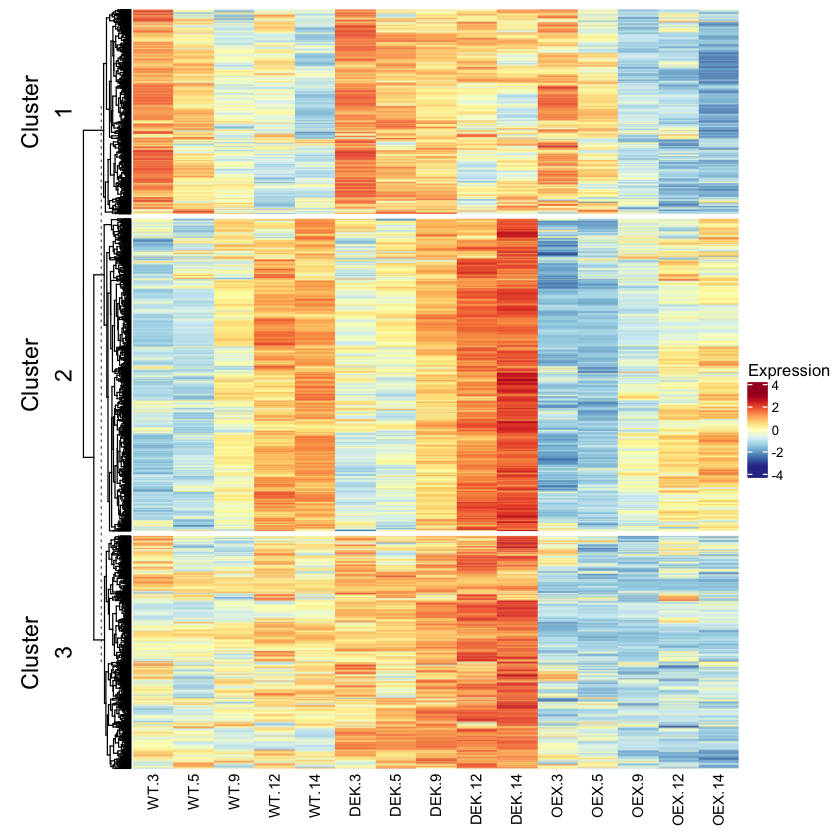

In [101]:
Heatmap(as.matrix(mat_2_scaled[,1:15]), split = split_2, col =rev(brewer.pal(11,'RdYlBu')), cluster_rows = TRUE, cluster_columns=FALSE, show_row_names = FALSE, show_column_names = TRUE, column_names_gp = gpar(fontsize = 9) , row_names_gp = gpar(fontsize=4),
        heatmap_legend_param = list(title = "Expression", title_gp = gpar(fontsize = 10),   labels_gp = gpar(fontsize = 8)))
